In [ ]:
!pip install ipython-autotime
%load_ext autotime

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 12.0 MB/s eta 0:00:00
time: 435 µs (started: 2025-02-02 09:46:08 +00:00)


# NER

In [ ]:
!pip install -q gliner


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.7/47.7 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 66.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 5.1 MB/s eta 0:00:00


In [ ]:
from gliner import GLiNER

model = GLiNER.from_pretrained("urchade/gliner_multi-v2.1")

Fetching 4 files:   0%|          | 0/4 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/transformers/convert_slow_tokenizer.py:561: UserWarning: The sentencepiece tokenizer that you are converting to a fast tokenizer uses the byte fallback option which is not implemented in the fast tokenizers. In practice this means that the fast version of the tokenizer can produce unknown tokens whereas the sentencepiece version would have converted these unknown tokens into a sequence of byte tokens matching the original piece of text.
  warnings.warn(


In [ ]:
text = """
Cristiano Ronaldo dos Santos Aveiro (Portuguese pronunciation: [kɾiʃˈtjɐnu ʁɔˈnaldu]; born 5 February 1985) is a Portuguese professional footballer who plays as a forward for and captains both Saudi Pro League club Al Nassr and the Portugal national team. Widely regarded as one of the greatest players of all time, Ronaldo has won five Ballon d'Or awards,[note 3] a record three UEFA Men's Player of the Year Awards, and four European Golden Shoes, the most by a European player. He has won 33 trophies in his career, including seven league titles, five UEFA Champions Leagues, the UEFA European Championship and the UEFA Nations League. Ronaldo holds the records for most appearances (183), goals (140) and assists (42) in the Champions League, goals in the European Championship (14), international goals (128) and international appearances (205). He is one of the few players to have made over 1,200 professional career appearances, the most by an outfield player, and has scored over 850 official senior career goals for club and country, making him the top goalscorer of all time.
"""

labels = ["person", "award", "date", "competitions", "teams"]

entities = model.predict_entities(text, labels)

for entity in entities:
    print(entity["text"], "=>", entity["label"])

# Summarization

In [ ]:
from transformers import pipeline

summarizer = pipeline("summarization", model="facebook/bart-large-cnn")

In [ ]:
ARTICLE = """ New York (CNN)When Liana Barrientos was 23 years old, she got married in Westchester County, New York.
A year later, she got married again in Westchester County, but to a different man and without divorcing her first husband.
Only 18 days after that marriage, she got hitched yet again. Then, Barrientos declared "I do" five more times, sometimes only within two weeks of each other.
In 2010, she married once more, this time in the Bronx. In an application for a marriage license, she stated it was her "first and only" marriage.
Barrientos, now 39, is facing two criminal counts of "offering a false instrument for filing in the first degree," referring to her false statements on the
2010 marriage license application, according to court documents.
Prosecutors said the marriages were part of an immigration scam.
On Friday, she pleaded not guilty at State Supreme Court in the Bronx, according to her attorney, Christopher Wright, who declined to comment further.
After leaving court, Barrientos was arrested and charged with theft of service and criminal trespass for allegedly sneaking into the New York subway through an emergency exit, said Detective
Annette Markowski, a police spokeswoman. In total, Barrientos has been married 10 times, with nine of her marriages occurring between 1999 and 2002.
All occurred either in Westchester County, Long Island, New Jersey or the Bronx. She is believed to still be married to four men, and at one time, she was married to eight men at once, prosecutors say.
Prosecutors said the immigration scam involved some of her husbands, who filed for permanent residence status shortly after the marriages.
Any divorces happened only after such filings were approved. It was unclear whether any of the men will be prosecuted.
The case was referred to the Bronx District Attorney\'s Office by Immigration and Customs Enforcement and the Department of Homeland Security\'s
Investigation Division. Seven of the men are from so-called "red-flagged" countries, including Egypt, Turkey, Georgia, Pakistan and Mali.
Her eighth husband, Rashid Rajput, was deported in 2006 to his native Pakistan after an investigation by the Joint Terrorism Task Force.
If convicted, Barrientos faces up to four years in prison.  Her next court appearance is scheduled for May 18.
"""
summarizer(ARTICLE, max_length=130, min_length=30, do_sample=False)

[{'summary_text': 'Liana Barrientos, 39, is charged with two counts of "offering a false instrument for filing in the first degree" In total, she has been married 10 times, with nine of her marriages occurring between 1999 and 2002. She is believed to still be married to four men.'}]

# Embedding Models CPU

In [ ]:
!pip install -q FlagEmbedding

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.8/161.8 kB 3.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 2.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 49.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 86.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 63.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 42.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 812.5 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.8 MB/s eta 0:00:

In [ ]:
from FlagEmbedding import BGEM3FlagModel

model = BGEM3FlagModel('BAAI/bge-m3', devices = "cpu", use_fp16= True) # Setting use_fp16 to True for inference speed

tokenizer_config.json:   0%|          | 0.00/444 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.1M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/964 [00:00<?, ?B/s]

Fetching 30 files:   0%|          | 0/30 [00:00<?, ?it/s]

.gitattributes:   0%|          | 0.00/1.63k [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/191 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/687 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/123 [00:00<?, ?B/s]

imgs/bm25.jpg:   0%|          | 0.00/132k [00:00<?, ?B/s]

README.md:   0%|          | 0.00/15.8k [00:00<?, ?B/s]

colbert_linear.pt:   0%|          | 0.00/2.10M [00:00<?, ?B/s]

imgs/.DS_Store:   0%|          | 0.00/6.15k [00:00<?, ?B/s]

imgs/long.jpg:   0%|          | 0.00/485k [00:00<?, ?B/s]

imgs/miracl.jpg:   0%|          | 0.00/576k [00:00<?, ?B/s]

imgs/mkqa.jpg:   0%|          | 0.00/608k [00:00<?, ?B/s]

imgs/others.webp:   0%|          | 0.00/21.0k [00:00<?, ?B/s]

long.jpg:   0%|          | 0.00/127k [00:00<?, ?B/s]

imgs/nqa.jpg:   0%|          | 0.00/158k [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

onnx/Constant_7_attr__value:   0%|          | 0.00/65.6k [00:00<?, ?B/s]

onnx/config.json:   0%|          | 0.00/698 [00:00<?, ?B/s]

onnx/tokenizer_config.json:   0%|          | 0.00/1.17k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/54.0 [00:00<?, ?B/s]

model.onnx:   0%|          | 0.00/725k [00:00<?, ?B/s]

model.onnx_data:   0%|          | 0.00/2.27G [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/2.27G [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.1M [00:00<?, ?B/s]

sparse_linear.pt:   0%|          | 0.00/3.52k [00:00<?, ?B/s]

time: 1min 13s (started: 2025-02-02 10:05:34 +00:00)


In [ ]:
model_name_or_path = 'Alibaba-NLP/gte-multilingual-base'
tokenizer = AutoTokenizer.from_pretrained(model_name_or_path)
model = AutoModel.from_pretrained(model_name_or_path, trust_remote_code=True)


tokenizer_config.json:   0%|          | 0.00/1.15k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.1M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/964 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.43k [00:00<?, ?B/s]

configuration.py:   0%|          | 0.00/7.13k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/Alibaba-NLP/new-impl:
- configuration.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


modeling.py:   0%|          | 0.00/59.0k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/Alibaba-NLP/new-impl:
- modeling.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


model.safetensors:   0%|          | 0.00/611M [00:00<?, ?B/s]

Some weights of the model checkpoint at Alibaba-NLP/gte-multilingual-base were not used when initializing NewModel: ['classifier.bias', 'classifier.weight']
- This IS expected if you are initializing NewModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing NewModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


time: 19.3 s (started: 2025-02-02 10:09:37 +00:00)


In [ ]:

import torch.nn.functional as F

from torch import Tensor
from transformers import AutoTokenizer, AutoModel
tokenizer = AutoTokenizer.from_pretrained('intfloat/multilingual-e5-small')
model = AutoModel.from_pretrained('intfloat/multilingual-e5-small')


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/443 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.1M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/167 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/655 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/471M [00:00<?, ?B/s]

time: 1min 36s (started: 2025-02-02 09:46:24 +00:00)


In [ ]:
import pandas as pd
import numpy as np
import time
from tqdm import tqdm
import random

def embedd(qs):
    # Tokenize the input texts
    batch_dict = tokenizer(qs, max_length=8192, padding=True, truncation=True, return_tensors='pt')

    outputs = model(**batch_dict)

    dimension=768 # The output dimension of the output embedding, should be in [128, 768]
    embeddings = outputs.last_hidden_state[:, 0][:dimension]
    return embeddings
    #def average_pool(last_hidden_states: Tensor,
    #             attention_mask: Tensor) -> Tensor:
    #    last_hidden = last_hidden_states.masked_fill(~attention_mask[..., None].bool(), 0.0)
    #    return last_hidden.sum(dim=1) / attention_mask.sum(dim=1)[..., None]

    #batch_dict = tokenizer(qs, max_length=512, padding=True, truncation=True, return_tensors='pt')
    #outputs = model(**batch_dict)
    #embeddings = average_pool(outputs.last_hidden_state, batch_dict['attention_mask'])
    #return embeddings
    #return model.encode(qs, return_dense=True,return_sparse=False)

queries = [
    "If you could live in any fictional world, which one would it be and why?",
    "What’s the most interesting thing you’ve learned this week?",
    "If you had to eat one meal for the rest of your life, what would it be?",
    "What’s a song that always makes you feel happy when you hear it?",
    "If you could instantly master any skill, what would it be?",
    "What’s the weirdest dream you’ve ever had?",
    "Do you prefer sunrise or sunset, and why?",
    "If you could have any animal as a pet, real or imaginary, what would it be?",
    "What’s a book or movie that changed your perspective on life?",
    "If you could teleport anywhere right now, where would you go?",
    "Current time in Tokyo",
    "Python factorial function",
    "Eiffel Tower height",
    "Square root of 64",
    "Best sci-fi books",
    "Chocolate cake recipe",
    "TCP vs UDP",
    "Translate hello to Spanish",
    "Latest iPhone release",
    "Elon Musk news",
    "What time is it in London?",
    "Best books of the decade",
    "How to fix a broken zipper?",
    "Top 10 healthiest fruits",
    "What’s the weather like today?",
    "Biggest mountain in Europe",
    "Can you explain relativity in simple terms?",
    "How many days are there in a leap year?",
    "Benefits of exercising daily",
    "Who discovered electricity?",
    "Fastest way to boil water",
    "What is the formula for area of a circle?",
    "Cheapest laptops under $500",
    "How does Wi-Fi work?",
    "Most endangered species in the world",
    "How do I change my car tire?",
    "Best beaches in the Caribbean",
    "What is string theory?",
    "Smallest country in the world",
    "Why do leaves change color in autumn?",
    "How to create a website from scratch",
    "Who is the current president of France?",
    "Top-rated restaurants in Los Angeles",
    "How long does it take to travel to the Moon?",
    "Benefits of drinking water with lemon",
    "What are black holes made of?",
    "How to bake a cake without eggs",
    "Simplest explanation of blockchain technology",
    "Where can I find free online courses?",
    "What are the symptoms of dehydration?"
]
import time
import pandas as pd
import numpy as np

def measure():
    # Collect measurements
    results = []

    for query in queries:
        start_time = time.time()
        embedd(query)
        execution_time = time.time() - start_time
        tokens = tokenizer(query, max_length=512, padding=True, truncation=True, return_tensors='pt')["input_ids"][0]
        #tokens = model.tokenizer.tokenize(query)
        print(tokens)
        token_count = len(tokens)

        results.append({
            'query': query,
            'tokens': token_count,
            'embedding_time': execution_time
        })

    # Create detailed DataFrame
    df = pd.DataFrame(results)

    # Calculate summary statistics
    summary = {
        'mean_time': df['embedding_time'].mean(),
        'median_time': df['embedding_time'].median(),
        'max_time': df['embedding_time'].max(),
        'std_time': df['embedding_time'].std(),
        'mean_tokens': df['tokens'].mean(),
        'median_tokens': df['tokens'].median(),
        'max_tokens': df['tokens'].max()
    }

    summary_df = pd.DataFrame([summary])

    return df, summary_df

time: 20.2 ms (started: 2025-02-02 10:11:32 +00:00)


In [ ]:
embedd("Hallo djs d")

tensor([[-6.6588e-01,  3.1846e+00, -3.5344e-01, -6.4143e-01, -6.4969e-01,
         -4.1674e-01, -4.1469e-02,  2.5982e+00,  4.5531e-01, -5.7125e-01,
         -2.1781e+00, -7.5451e-01, -9.8463e-01,  7.4236e-01, -1.1426e+00,
          7.9403e-01,  4.0634e+00, -3.4142e-01,  4.9470e-01, -5.4770e-01,
          7.5955e-02,  1.0476e+00, -9.7015e-01,  2.0213e-01,  3.6528e-01,
          9.1289e-01,  1.5550e+00, -7.8417e-01, -9.9810e-01,  5.4757e-01,
         -2.5527e+00, -2.5270e+00, -9.3202e-02,  1.3330e+00,  1.1274e+00,
         -1.3778e+00,  2.0400e-01,  4.3634e-01, -1.4522e+00, -8.4323e-01,
         -1.0925e+00, -3.1672e-01, -4.1450e-01,  6.2941e-01,  2.6188e-01,
          5.4935e-01,  6.6068e-01,  1.7489e-01,  1.2146e+00,  2.8745e-01,
         -4.5902e-01,  8.2454e-01,  7.5170e-01,  1.7956e+00,  8.3468e-01,
          1.0398e+00, -2.3350e+00, -3.6101e-01,  9.8981e-01, -1.7355e-01,
          1.0709e+00, -6.5211e-02, -4.4178e-01, -4.1215e-01, -1.1596e+00,
         -2.4480e-01,  7.3469e-01, -5.

time: 305 ms (started: 2025-02-02 10:11:38 +00:00)


In [ ]:
_, summary = measure()
summary

tensor([     0,   4263,    398,   5809,   6867,     23,   2499, 127663,    289,
          8999,      4,   3129,   1632,   2806,    442,    186,    136,  15400,
            32,      2])
tensor([    0,  4865,    26,     7,    70,  2684, 49041, 13580,   398,    26,
          272, 97384,   903,  5895,    32,     2])
tensor([     0,   4263,    398,   1902,     47,  73203,   1632, 109911,    100,
            70,  10588,    111,    935,   6897,      4,   2367,   2806,    442,
           186,     32,      2])
tensor([    0,  4865,    26,     7,    10, 11531,   450, 11343, 30482,   398,
        12319, 17723,  3229,   398, 36802,   442,    32,     2])
tensor([     0,   4263,    398,   5809,  34648,    538,  31347,   2499, 112419,
             4,   2367,   2806,    442,    186,     32,      2])
tensor([     0,   4865,     26,      7,     70, 179459,    525,  48869,    398,
            26,    272,  17669,   1902,     32,      2])
tensor([    0,   984,   398, 12601,  4262, 58944,   707,  4262,  350

,mean_time,median_time,max_time,std_time,mean_tokens,median_tokens,max_tokens
0,0.27831,0.230743,0.73887,0.1345,10.52,10.0,22


time: 14.1 s (started: 2025-02-02 10:11:42 +00:00)


In [ ]:
len(queries)


50

time: 4.22 ms (started: 2025-02-02 10:12:59 +00:00)


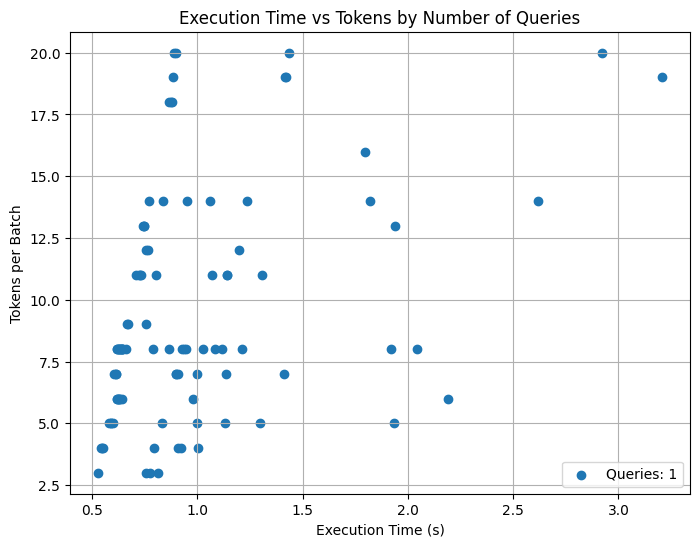

time: 341 ms (started: 2025-02-02 09:36:21 +00:00)


In [ ]:
import matplotlib.pyplot as plt

number_token = token['Mean Tokens'].astype(float) * token['Number of Queries'].astype(float)

plt.figure(figsize=(8, 6))

classes = token['Number of Queries'].unique()

for class_value in classes:
    class_mask = token['Number of Queries'] == class_value
    plt.scatter(
        times['Execution Time (s)'][class_mask],
        number_token[class_mask],
        label=f'Queries: {class_value}'
    )

plt.xlabel('Execution Time (s)')
plt.ylabel('Tokens per Batch')
plt.title('Execution Time vs Tokens by Number of Queries')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from sentence_transformers import SentenceTransformer

# docs do not need any prompts
docs = [
    "There are many effective ways to reduce stress. Some common techniques include deep breathing, meditation, and physical activity. Engaging in hobbies, spending time in nature, and connecting with loved ones can also help alleviate stress. Additionally, setting boundaries, practicing self-care, and learning to say no can prevent stress from building up.",
    "Green tea has been consumed for centuries and is known for its potential health benefits. It contains antioxidants that may help protect the body against damage caused by free radicals. Regular consumption of green tea has been associated with improved heart health, enhanced cognitive function, and a reduced risk of certain types of cancer. The polyphenols in green tea may also have anti-inflammatory and weight loss properties.",
]

# ！The default dimension is 1024, if you need other dimensions, please clone the model and modify `modules.json` to replace `2_Dense_1024` with another dimension, e.g. `2_Dense_256` or `2_Dense_8192` !
# you can also use this model without the features of `use_memory_efficient_attention` and `unpad_inputs`. It can be worked in CPU.
model = SentenceTransformer(
     "dunzhang/stella_en_400M_v5",
     trust_remote_code=True,
     device="cpu",
     config_kwargs={"use_memory_efficient_attention": False, "unpad_inputs": False}
)

doc_embeddings = model.encode(docs)



Some weights of the model checkpoint at dunzhang/stella_en_400M_v5 were not used when initializing NewModel: ['new.pooler.dense.bias', 'new.pooler.dense.weight']
- This IS expected if you are initializing NewModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing NewModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
query_prompt_name = "s2p_query"
queries = [
    "What are some ways to reduce stress?",
    "What are the benefits of drinking green tea?",
]
# docs do not need any prompts
docs = [
    "There are many effective ways to reduce stress. Some common techniques include deep breathing, meditation, and physical activity. Engaging in hobbies, spending time in nature, and connecting with loved ones can also help alleviate stress. Additionally, setting boundaries, practicing self-care, and learning to say no can prevent stress from building up.",
    "Green tea has been consumed for centuries and is known for its potential health benefits. It contains antioxidants that may help protect the body against damage caused by free radicals. Regular consumption of green tea has been associated with improved heart health, enhanced cognitive function, and a reduced risk of certain types of cancer. The polyphenols in green tea may also have anti-inflammatory and weight loss properties.",
]

query_embeddings = model.encode(queries, prompt_name=query_prompt_name)

print(query_embeddings.shape, doc_embeddings.shape)
# (2, 1024) (2, 1024)

similarities = model.similarity(query_embeddings, doc_embeddings)
print(similarities)
# tensor([[0.8398, 0.2990],
#         [0.3282, 0.8095]])

(2, 1024) (2, 1024)
tensor([[0.8398, 0.2990],
        [0.3282, 0.8095]])


stella is really fast on a cpu (1sec)

In [ ]:
# Requires sentence-transformers>=3.0.0

from sentence_transformers import SentenceTransformer

input_texts = [
    "what is the capital of China?",
    "how to implement quick sort in python?",
    "北京",
    "快排算法介绍"
]

model_name_or_path="Alibaba-NLP/gte-multilingual-base"
model = SentenceTransformer(model_name_or_path, trust_remote_code=True)


KeyboardInterrupt: 

time: 7.61 s (started: 2024-11-22 12:31:26 +00:00)


In [ ]:
embeddings = model.encode(input_texts, normalize_embeddings=True) # embeddings.shape (4, 768)

# sim scores
scores = model.similarity(embeddings[:1], embeddings[1:])

print(scores.tolist())
# [[0.301699697971344, 0.7503870129585266, 0.32030850648880005]]


time: 264 ms (started: 2024-11-21 12:43:25 +00:00)


In [ ]:
# coding=utf-8
# Copyright 2024 The GTE Team Authors and Alibaba Group.
# Licensed under the Apache License, Version 2.0 (the "License");
!pip install -q transformers torch

from collections import defaultdict
from typing import Dict, List, Tuple

import numpy as np
import torch
from transformers import AutoModelForTokenClassification, AutoTokenizer
from transformers.utils import is_torch_npu_available


class GTEEmbeddidng(torch.nn.Module):
    def __init__(self,
                 model_name: str = None,
                 normalized: bool = True,
                 use_fp16: bool = True,
                 device: str = None
                ):
        super().__init__()
        self.normalized = normalized
        if device:
            self.device = torch.device(device)
        else:
            if torch.cuda.is_available():
                self.device = torch.device("cuda")
            elif torch.backends.mps.is_available():
                self.device = torch.device("mps")
            elif is_torch_npu_available():
                self.device = torch.device("npu")
            else:
                self.device = torch.device("cpu")
                use_fp16 = False
        self.use_fp16 = use_fp16
        self.tokenizer = AutoTokenizer.from_pretrained(model_name)
        self.model = AutoModelForTokenClassification.from_pretrained(
            model_name, trust_remote_code=True, torch_dtype=torch.float16 if self.use_fp16 else None
        )
        self.vocab_size = self.model.config.vocab_size
        self.model.to(self.device)

    def _process_token_weights(self, token_weights: np.ndarray, input_ids: list):
        # conver to dict
        result = defaultdict(int)
        unused_tokens = set([self.tokenizer.cls_token_id, self.tokenizer.eos_token_id, self.tokenizer.pad_token_id,
                             self.tokenizer.unk_token_id])
        # token_weights = np.ceil(token_weights * 100)
        for w, idx in zip(token_weights, input_ids):
            if idx not in unused_tokens and w > 0:
                token = self.tokenizer.decode([int(idx)])
                if w > result[token]:
                    result[token] = w
        return result

    @torch.no_grad()
    def encode(self,
               texts: None,
               dimension: int = None,
               max_length: int = 8192,
               batch_size: int = 16,
               return_dense: bool = True,
               return_sparse: bool = False):
        if dimension is None:
            dimension = self.model.config.hidden_size
        if isinstance(texts, str):
            texts = [texts]
        num_texts = len(texts)
        all_dense_vecs = []
        all_token_weights = []
        for n, i in enumerate(range(0, num_texts, batch_size)):
            batch = texts[i: i + batch_size]
            resulst = self._encode(batch, dimension, max_length, batch_size, return_dense, return_sparse)
            if return_dense:
                all_dense_vecs.append(resulst['dense_embeddings'])
            if return_sparse:
                all_token_weights.extend(resulst['token_weights'])
        all_dense_vecs = torch.cat(all_dense_vecs, dim=0)
        return {
            "dense_embeddings": all_dense_vecs,
            "token_weights": all_token_weights
        }

    @torch.no_grad()
    def _encode(self,
                texts: Dict[str, torch.Tensor] = None,
                dimension: int = None,
                max_length: int = 1024,
                batch_size: int = 16,
                return_dense: bool = True,
                return_sparse: bool = False):

        text_input = self.tokenizer(texts, padding=True, truncation=True, return_tensors='pt', max_length=max_length)
        text_input = {k: v.to(self.model.device) for k,v in text_input.items()}
        model_out = self.model(**text_input, return_dict=True)

        output = {}
        if return_dense:
            dense_vecs = model_out.last_hidden_state[:, 0, :dimension]
            if self.normalized:
                dense_vecs = torch.nn.functional.normalize(dense_vecs, dim=-1)
            output['dense_embeddings'] = dense_vecs
        if return_sparse:
            token_weights = torch.relu(model_out.logits).squeeze(-1)
            token_weights = list(map(self._process_token_weights, token_weights.detach().cpu().numpy().tolist(),
                                                    text_input['input_ids'].cpu().numpy().tolist()))
            output['token_weights'] = token_weights

        return output

    def _compute_sparse_scores(self, embs1, embs2):
        scores = 0
        for token, weight in embs1.items():
            if token in embs2:
                scores += weight * embs2[token]
        return scores

    def compute_sparse_scores(self, embs1, embs2):
        scores = [self._compute_sparse_scores(emb1, emb2) for emb1, emb2 in zip(embs1, embs2)]
        return np.array(scores)

    def compute_dense_scores(self, embs1, embs2):
        scores = torch.sum(embs1*embs2, dim=-1).cpu().detach().numpy()
        return scores

    @torch.no_grad()
    def compute_scores(self,
        text_pairs: List[Tuple[str, str]],
        dimension: int = None,
        max_length: int = 1024,
        batch_size: int = 16,
        dense_weight=1.0,
        sparse_weight=0.1):
        text1_list = [text_pair[0] for text_pair in text_pairs]
        text2_list = [text_pair[1] for text_pair in text_pairs]
        embs1 = self.encode(text1_list, dimension, max_length, batch_size, return_dense=True, return_sparse=True)
        embs2 = self.encode(text2_list, dimension, max_length, batch_size, return_dense=True, return_sparse=True)
        scores = self.compute_dense_scores(embs1['dense_embeddings'], embs2['dense_embeddings']) * dense_weight + \
            self.compute_sparse_scores(embs1['token_weights'], embs2['token_weights']) * sparse_weight
        scores = scores.tolist()
        return scores


time: 15.7 s (started: 2024-11-29 14:35:51 +00:00)


In [ ]:
# You can find the script gte_embedding.py in https://huggingface.co/Alibaba-NLP/gte-multilingual-base/blob/main/scripts/gte_embedding.py

model_name_or_path = 'Alibaba-NLP/gte-multilingual-base'
model = GTEEmbeddidng(model_name_or_path)



/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/1.15k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.1M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/964 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.43k [00:00<?, ?B/s]

configuration.py:   0%|          | 0.00/7.13k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/Alibaba-NLP/new-impl:
- configuration.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


modeling.py:   0%|          | 0.00/59.0k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/Alibaba-NLP/new-impl:
- modeling.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


model.safetensors:   0%|          | 0.00/611M [00:00<?, ?B/s]

time: 44.2 s (started: 2024-11-29 14:36:08 +00:00)


In [ ]:
query = "Was ist die Hauptstadt von China?"

docs = [
    "what is the capital of China?",
    "how to implement quick sort in python?",
    "was für ein müll",
    "Die Hauptstadt von China ist Peking"
]

embs = model.encode(docs, return_dense=True,return_sparse=True)
print('dense_embeddings vecs', embs['dense_embeddings'])
print('token_weights', embs['token_weights'])
pairs = [(query, doc) for doc in docs]
dense_scores = model.compute_scores(pairs, dense_weight=1.0, sparse_weight=0.0)
sparse_scores = model.compute_scores(pairs, dense_weight=0.0, sparse_weight=1.0)
hybrid_scores = model.compute_scores(pairs, dense_weight=1.0, sparse_weight=0.3)

print('dense_scores', dense_scores)
print('sparse_scores', sparse_scores)
print('hybrid_scores', hybrid_scores)

dense_embeddings vecs tensor([[-0.0736,  0.0593, -0.0845,  ..., -0.0152, -0.0313, -0.0311],
        [-0.0586,  0.0612, -0.0754,  ...,  0.0382, -0.0133, -0.0218],
        [-0.0141,  0.0651, -0.0204,  ..., -0.0743,  0.0714, -0.0173],
        [-0.0967,  0.1011, -0.1063,  ..., -0.0065, -0.0053, -0.0175]],
       device='cuda:0', dtype=torch.float16)
token_weights [defaultdict(<class 'int'>, {'what': 0.450439453125, 'is': 1.603515625, 'the': 2.017578125, 'capital': 2.005859375, 'of': 1.7490234375, 'China': 2.7578125, '?': 0.23583984375}), defaultdict(<class 'int'>, {'how': 0.939453125, 'to': 1.833984375, 'implement': 1.818359375, 'quick': 2.46875, 'sort': 3.435546875, 'in': 0.492431640625, 'py': 0.736328125, 'thon': 1.251953125}), defaultdict(<class 'int'>, {'was': 0.7509765625, 'für': 1.62890625, 'ein': 1.314453125, 'mü': 3.150390625, 'll': 2.74609375}), defaultdict(<class 'int'>, {'Die': 1.0693359375, 'Hauptstadt': 1.4296875, 'von': 1.0322265625, 'China': 2.17578125, 'ist': 1.5458984375, 

In [ ]:
model.encode(["Was ist die Hauptstadt von China?"], return_dense=True,return_sparse=False)

{'dense_embeddings': tensor([[-9.7473e-02,  7.2693e-02, -7.8308e-02,  4.0924e-02, -6.5857e-02,
          -6.2195e-02,  2.6741e-03, -1.8082e-02,  5.6854e-02, -6.6956e-02,
           1.0803e-01, -1.6266e-02, -1.0553e-01,  9.4070e-03, -7.7667e-03,
           2.9129e-02,  3.9642e-02,  8.9294e-02, -1.4320e-02,  9.5276e-02,
           7.8613e-02,  3.4119e-02, -6.2323e-04, -6.9275e-03, -3.7842e-02,
          -2.3865e-02,  4.7150e-02, -9.3079e-02, -5.0049e-02,  5.8716e-02,
          -7.4646e-02, -6.1890e-02, -2.8275e-02, -2.9053e-02, -2.5238e-02,
          -7.4707e-02,  2.4017e-02,  2.2278e-02, -1.1749e-03,  4.0802e-02,
          -4.8218e-02,  5.0545e-03, -4.5044e-02, -7.8011e-03, -6.3354e-02,
          -9.3603e-04, -2.8275e-02,  6.2347e-02,  6.1310e-02,  8.1726e-02,
           8.1482e-03,  1.6403e-02,  5.3375e-02,  4.8584e-02,  9.7809e-03,
           5.6091e-02, -9.1919e-02,  3.3051e-02,  5.3192e-02, -1.9745e-02,
           1.3596e-02, -2.8000e-03,  2.2308e-02, -4.8004e-02,  3.9581e-02,
     

time: 66 ms (started: 2024-11-29 14:36:53 +00:00)


In [ ]:
import pandas as pd
import numpy as np
import time
from tqdm import tqdm
import random

def embedd(queries):
    model.encode(queries, return_dense=True,return_sparse=True)

queries = [
    "If you could live in any fictional world, which one would it be and why?",
    "What’s the most interesting thing you’ve learned this week?",
    "If you had to eat one meal for the rest of your life, what would it be?",
    "What’s a song that always makes you feel happy when you hear it?",
    "If you could instantly master any skill, what would it be?",
    "What’s the weirdest dream you’ve ever had?",
    "Do you prefer sunrise or sunset, and why?",
    "If you could have any animal as a pet, real or imaginary, what would it be?",
    "What’s a book or movie that changed your perspective on life?",
    "If you could teleport anywhere right now, where would you go?",
    "Current time in Tokyo",
    "Python factorial function",
    "Eiffel Tower height",
    "Square root of 64",
    "Best sci-fi books",
    "Chocolate cake recipe",
    "TCP vs UDP",
    "Translate hello to Spanish",
    "Latest iPhone release",
    "Elon Musk news",
    "What time is it in London?",
    "Best books of the decade",
    "How to fix a broken zipper?",
    "Top 10 healthiest fruits",
    "What’s the weather like today?",
    "Biggest mountain in Europe",
    "Can you explain relativity in simple terms?",
    "How many days are there in a leap year?",
    "Benefits of exercising daily",
    "Who discovered electricity?",
    "Fastest way to boil water",
    "What is the formula for area of a circle?",
    "Cheapest laptops under $500",
    "How does Wi-Fi work?",
    "Most endangered species in the world",
    "How do I change my car tire?",
    "Best beaches in the Caribbean",
    "What is string theory?",
    "Smallest country in the world",
    "Why do leaves change color in autumn?",
    "How to create a website from scratch",
    "Who is the current president of France?",
    "Top-rated restaurants in Los Angeles",
    "How long does it take to travel to the Moon?",
    "Benefits of drinking water with lemon",
    "What are black holes made of?",
    "How to bake a cake without eggs",
    "Simplest explanation of blockchain technology",
    "Where can I find free online courses?",
    "What are the symptoms of dehydration?"
]

import random
import time
import numpy as np
import pandas as pd
from tqdm import tqdm

def measure(queries):
    n_times = 100
    load_test_results = []
    all_execution_times = []
    all_token_counts = []

    for num_queries in tqdm(range(1, 11), desc="Load Testing Progress"):
        execution_times = []
        token_counts = []

        for _ in range(n_times):
            selected_queries = random.sample(queries, num_queries)

            start_time = time.time()

            embedd(selected_queries)

            end_time = time.time()

            query_token_list = [len(model.tokenizer.tokenize(query)) for query in selected_queries]
            execution_time = end_time - start_time
            execution_times.append(execution_time)
            all_execution_times.append({"Number of Queries": num_queries, "Execution Time (s)": execution_time})

            avg_token_count = np.mean(query_token_list)
            token_counts.append(avg_token_count)
            all_token_counts.append({"Number of Queries": num_queries, "Mean Tokens": avg_token_count})


        mean_time = np.mean(execution_times)
        median_time = np.median(execution_times)
        max_time = np.max(execution_times)
        mean_tokens = np.mean(token_counts)
        top_quantile_indexes = np.where(execution_times >= max_time)[0]
        top_quantile_mean_tokens = [token_counts[i] for i in top_quantile_indexes]

        load_test_results.append({
            "Number of Queries": num_queries,
            "Mean Time (s)": mean_time,
            "Stdev Time (s)": np.std(execution_times),
            "Median Time (s)": median_time,
            "Max Time (s)": max_time,
            "Mean Tokens": mean_tokens,
            "Max Time Mean Tokens": np.mean(top_quantile_mean_tokens)

        })

    df_load_test = pd.DataFrame(load_test_results)
    df_execution_times = pd.DataFrame(all_execution_times)
    df_token_counts = pd.DataFrame(all_token_counts)

    return df_load_test, df_execution_times, df_token_counts


time: 2.21 ms (started: 2024-11-29 14:36:53 +00:00)


In [ ]:
embedd("Hallo")

time: 15.1 ms (started: 2024-11-29 14:40:20 +00:00)


In [ ]:
gpu, times, token = measure(queries)
gpu

Load Testing Progress: 100%|██████████| 10/10 [00:12<00:00,  1.24s/it]


,Number of Queries,Mean Time (s),Stdev Time (s),Median Time (s),Max Time (s),Mean Tokens,Max Time Mean Tokens
0,1,0.015457,0.002544,0.015118,0.026090,9.010000,5.000000
1,2,0.010413,0.001015,0.010099,0.016522,9.320000,7.000000
2,3,0.011156,0.000971,0.011025,0.015984,8.686667,7.333333
3,4,0.011165,0.001564,0.010597,0.021904,8.390000,7.750000
4,5,0.011480,0.001467,0.011131,0.019658,8.588000,12.400000
5,6,0.011201,0.001316,0.010858,0.019416,8.325000,8.000000
6,7,0.011482,0.001192,0.011136,0.017782,8.604286,8.428571
7,8,0.011165,0.001063,0.010918,0.016547,8.368750,7.375000
8,9,0.011343,0.001414,0.011062,0.021838,8.426667,8.555556
9,10,0.014535,0.002733,0.014679,0.020276,8.303000,6.600000


time: 12.5 s (started: 2024-11-29 14:42:20 +00:00)


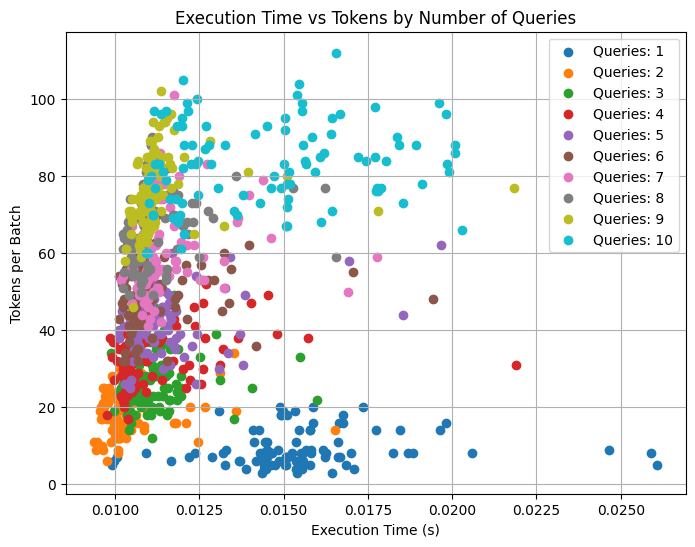

time: 411 ms (started: 2024-11-29 14:42:34 +00:00)


In [ ]:
import matplotlib.pyplot as plt

number_token = token['Mean Tokens'].astype(float) * token['Number of Queries'].astype(float)

plt.figure(figsize=(8, 6))

classes = token['Number of Queries'].unique()

for class_value in classes:
    class_mask = token['Number of Queries'] == class_value
    plt.scatter(
        times['Execution Time (s)'][class_mask],
        number_token[class_mask],
        label=f'Queries: {class_value}'
    )

plt.xlabel('Execution Time (s)')
plt.ylabel('Tokens per Batch')
plt.title('Execution Time vs Tokens by Number of Queries')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
!pip install -q git+https://github.com/illuin-tech/colpali torch

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
time: 23 s (started: 2024-11-22 12:37:09 +00:00)


In [ ]:
import torch
from PIL import Image

from colpali_engine.models import ColQwen2, ColQwen2Processor

model = ColQwen2.from_pretrained(
        "vidore/colqwen2-v1.0",
        torch_dtype=torch.bfloat16,
        device_map="cpu",  # or "mps" if on Apple Silicon
    ).eval()
processor = ColQwen2Processor.from_pretrained("vidore/colqwen2-v1.0")



/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


adapter_config.json:   0%|          | 0.00/728 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.17k [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/56.5k [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/4.98G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/3.85G [00:00<?, ?B/s]

`Qwen2VLRotaryEmbedding` can now be fully parameterized by passing the model config through the `config` argument. All other arguments will be removed in v4.46


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/220 [00:00<?, ?B/s]

No CUDA runtime is found, using CUDA_HOME='/usr/local/cuda'


adapter_model.safetensors:   0%|          | 0.00/74.0M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/568 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/4.30k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/2.78M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/1.67M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/11.4M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/392 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/613 [00:00<?, ?B/s]

chat_template.json:   0%|          | 0.00/1.05k [00:00<?, ?B/s]

time: 5min 10s (started: 2024-11-22 12:37:39 +00:00)


In [ ]:
queries = [
    "Is attention really all you need?",
]
batch_queries = processor.process_queries(queries).to(model.device)
# Forward pass
with torch.no_grad():
    query_embeddings = model(**batch_queries)

time: 25.7 s (started: 2024-11-21 15:45:30 +00:00)


query batches with cpu (6/7 GB of RAM used)

In [ ]:
queries = [
    "Is attention really all you need?",
    "What is the amount of bananas farmed in Salvador?",
]
batch_queries = processor.process_queries(queries).to(model.device)
# Forward pass
with torch.no_grad():
    query_embeddings = model(**batch_queries)

time: 1min 5s (started: 2024-11-15 11:33:14 +00:00)


In [ ]:
queries = [
    "Is attention really all you need?",
    "What is the amount of bananas farmed in Salvador?",
    "What is the capital of Spain?",
]
batch_queries = processor.process_queries(queries).to(model.device)
# Forward pass
with torch.no_grad():
    query_embeddings = model(**batch_queries)

time: 1min 32s (started: 2024-11-15 11:34:20 +00:00)


In [ ]:
import pandas as pd
import numpy as np
import time
from tqdm import tqdm
import random

def embedd(queries, model=model, processor=processor):
    batch_queries = processor.process_queries(queries).to(model.device)
    # Forward pass
    with torch.no_grad():
        query_embeddings = model(**batch_queries)

queries = [
    "If you could live in any fictional world, which one would it be and why?",
    "What’s the most interesting thing you’ve learned this week?",
    "If you had to eat one meal for the rest of your life, what would it be?",
    "What’s a song that always makes you feel happy when you hear it?",
    "If you could instantly master any skill, what would it be?",
    "What’s the weirdest dream you’ve ever had?",
    "Do you prefer sunrise or sunset, and why?",
    "If you could have any animal as a pet, real or imaginary, what would it be?",
    "What’s a book or movie that changed your perspective on life?",
    "If you could teleport anywhere right now, where would you go?",
    "Current time in Tokyo",
    "Python factorial function",
    "Eiffel Tower height",
    "Square root of 64",
    "Best sci-fi books",
    "Chocolate cake recipe",
    "TCP vs UDP",
    "Translate hello to Spanish",
    "Latest iPhone release",
    "Elon Musk news",
    "What time is it in London?",
    "Best books of the decade",
    "How to fix a broken zipper?",
    "Top 10 healthiest fruits",
    "What’s the weather like today?",
    "Biggest mountain in Europe",
    "Can you explain relativity in simple terms?",
    "How many days are there in a leap year?",
    "Benefits of exercising daily",
    "Who discovered electricity?",
    "Fastest way to boil water",
    "What is the formula for area of a circle?",
    "Cheapest laptops under $500",
    "How does Wi-Fi work?",
    "Most endangered species in the world",
    "How do I change my car tire?",
    "Best beaches in the Caribbean",
    "What is string theory?",
    "Smallest country in the world",
    "Why do leaves change color in autumn?",
    "How to create a website from scratch",
    "Who is the current president of France?",
    "Top-rated restaurants in Los Angeles",
    "How long does it take to travel to the Moon?",
    "Benefits of drinking water with lemon",
    "What are black holes made of?",
    "How to bake a cake without eggs",
    "Simplest explanation of blockchain technology",
    "Where can I find free online courses?",
    "What are the symptoms of dehydration?"
]

import random
import time
import numpy as np
import pandas as pd
from tqdm import tqdm

def measure(queries):
    n_times = 100
    load_test_results = []
    all_execution_times = []
    all_token_counts = []

    for num_queries in tqdm(range(1, 2), desc="Load Testing Progress"):
        execution_times = []
        token_counts = []

        for _ in range(n_times):
            selected_queries = random.sample(queries, num_queries)
            batch_queries = processor.process_queries(selected_queries)
            start_time = time.time()

            batch_queries = batch_queries.to(model.device)

            with torch.no_grad():
                query_embeddings = model(**batch_queries)

            end_time = time.time()

            query_token_list = batch_queries["attention_mask"].sum(dim=1).tolist()
            execution_time = end_time - start_time
            execution_times.append(execution_time)
            all_execution_times.append({"Number of Queries": num_queries, "Execution Time (s)": execution_time})

            avg_token_count = np.mean(query_token_list)
            token_counts.append(avg_token_count)
            all_token_counts.append({"Number of Queries": num_queries, "Mean Tokens": avg_token_count})


        mean_time = np.mean(execution_times)
        median_time = np.median(execution_times)
        max_time = np.max(execution_times)
        mean_tokens = np.mean(token_counts)
        top_quantile_indexes = np.where(execution_times >= max_time)[0]
        top_quantile_mean_tokens = [token_counts[i] for i in top_quantile_indexes]

        load_test_results.append({
            "Number of Queries": num_queries,
            "Mean Time (s)": mean_time,
            "Stdev Time (s)": np.std(execution_times),
            "Median Time (s)": median_time,
            "Max Time (s)": max_time,
            "Mean Tokens": mean_tokens,
            "Max Time Mean Tokens": np.mean(top_quantile_mean_tokens)

        })

    df_load_test = pd.DataFrame(load_test_results)
    df_execution_times = pd.DataFrame(all_execution_times)
    df_token_counts = pd.DataFrame(all_token_counts)

    return df_load_test, df_execution_times, df_token_counts


time: 3.38 ms (started: 2024-11-22 16:26:27 +00:00)


In [ ]:
# dummy for warm start
embedd(["Hallo"])

time: 17.8 s (started: 2024-11-22 16:26:31 +00:00)


In [ ]:
t4, times, token = measure(queries)
t4

Load Testing Progress: 100%|██████████| 1/1 [40:59<00:00, 2459.40s/it]


,Number of Queries,Mean Time (s),Stdev Time (s),Median Time (s),Max Time (s),Mean Tokens,Max Time Mean Tokens
0,1,24.593065,5.302818,23.355487,40.184158,19.01,31.0


time: 40min 59s (started: 2024-11-22 16:26:48 +00:00)


In [ ]:
import matplotlib.pyplot as plt

number_token = token['Mean Tokens'].astype(float) * token['Number of Queries'].astype(float)

plt.figure(figsize=(8, 6))

classes = token['Number of Queries'].unique()

for class_value in classes:
    class_mask = token['Number of Queries'] == class_value
    plt.scatter(
        times['Execution Time (s)'][class_mask],
        number_token[class_mask],
        label=f'Queries: {class_value}'
    )

plt.xlabel('Execution Time (s)')
plt.ylabel('Tokens')
plt.title('Execution Time vs Tokens by Number of Queries')
plt.legend()
plt.grid(True)
plt.show()

# Embedding Models with GPU

query batches with gpu (T4)

In [ ]:
!pip install -q git+https://github.com/illuin-tech/colpali

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 251.6/251.6 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 83.6 MB/s eta 0:00:00


In [ ]:
import torch
from PIL import Image

from colpali_engine.models import ColQwen2, ColQwen2Processor

model2 = ColQwen2.from_pretrained(
        "vidore/colqwen2-v1.0",
        torch_dtype=torch.bfloat16,
        device_map="cuda",  # or "mps" if on Apple Silicon
    ).eval()
processor2 = ColQwen2Processor.from_pretrained("vidore/colqwen2-v1.0")



Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

after loading: 4.6 GB RAM, 4.7 GB VRAM

In [ ]:
import pandas as pd
import numpy as np
import time
from tqdm import tqdm
import random

def embedd(queries, model=model, processor=processor):
    batch_queries = processor.process_queries(queries).to(model.device)
    # Forward pass
    with torch.no_grad():
        query_embeddings = model(**batch_queries)

queries = [
    "If you could live in any fictional world, which one would it be and why?",
    "What’s the most interesting thing you’ve learned this week?",
    "If you had to eat one meal for the rest of your life, what would it be?",
    "What’s a song that always makes you feel happy when you hear it?",
    "If you could instantly master any skill, what would it be?",
    "What’s the weirdest dream you’ve ever had?",
    "Do you prefer sunrise or sunset, and why?",
    "If you could have any animal as a pet, real or imaginary, what would it be?",
    "What’s a book or movie that changed your perspective on life?",
    "If you could teleport anywhere right now, where would you go?",
    "Current time in Tokyo",
    "Python factorial function",
    "Eiffel Tower height",
    "Square root of 64",
    "Best sci-fi books",
    "Chocolate cake recipe",
    "TCP vs UDP",
    "Translate hello to Spanish",
    "Latest iPhone release",
    "Elon Musk news",
    "What time is it in London?",
    "Best books of the decade",
    "How to fix a broken zipper?",
    "Top 10 healthiest fruits",
    "What’s the weather like today?",
    "Biggest mountain in Europe",
    "Can you explain relativity in simple terms?",
    "How many days are there in a leap year?",
    "Benefits of exercising daily",
    "Who discovered electricity?",
    "Fastest way to boil water",
    "What is the formula for area of a circle?",
    "Cheapest laptops under $500",
    "How does Wi-Fi work?",
    "Most endangered species in the world",
    "How do I change my car tire?",
    "Best beaches in the Caribbean",
    "What is string theory?",
    "Smallest country in the world",
    "Why do leaves change color in autumn?",
    "How to create a website from scratch",
    "Who is the current president of France?",
    "Top-rated restaurants in Los Angeles",
    "How long does it take to travel to the Moon?",
    "Benefits of drinking water with lemon",
    "What are black holes made of?",
    "How to bake a cake without eggs",
    "Simplest explanation of blockchain technology",
    "Where can I find free online courses?",
    "What are the symptoms of dehydration?"
]

import random
import time
import numpy as np
import pandas as pd
from tqdm import tqdm

def measure(queries):
    n_times = 100
    load_test_results = []
    all_execution_times = []
    all_token_counts = []

    for num_queries in tqdm(range(1, 11), desc="Load Testing Progress"):
        execution_times = []
        token_counts = []

        for _ in range(n_times):
            selected_queries = random.sample(queries, num_queries)
            batch_queries = processor.process_queries(selected_queries)
            start_time = time.time()

            batch_queries = batch_queries.to(model.device)

            with torch.no_grad():
                query_embeddings = model(**batch_queries)

            end_time = time.time()

            query_token_list = batch_queries["attention_mask"].sum(dim=1).tolist()
            execution_time = end_time - start_time
            execution_times.append(execution_time)
            all_execution_times.append({"Number of Queries": num_queries, "Execution Time (s)": execution_time})

            avg_token_count = np.mean(query_token_list)
            token_counts.append(avg_token_count)
            all_token_counts.append({"Number of Queries": num_queries, "Mean Tokens": avg_token_count})


        mean_time = np.mean(execution_times)
        median_time = np.median(execution_times)
        max_time = np.max(execution_times)
        mean_tokens = np.mean(token_counts)
        top_quantile_indexes = np.where(execution_times >= max_time)[0]
        top_quantile_mean_tokens = [token_counts[i] for i in top_quantile_indexes]

        load_test_results.append({
            "Number of Queries": num_queries,
            "Mean Time (s)": mean_time,
            "Stdev Time (s)": np.std(execution_times),
            "Median Time (s)": median_time,
            "Max Time (s)": max_time,
            "Mean Tokens": mean_tokens,
            "Max Time Mean Tokens": np.mean(top_quantile_mean_tokens)

        })

    df_load_test = pd.DataFrame(load_test_results)
    df_execution_times = pd.DataFrame(all_execution_times)
    df_token_counts = pd.DataFrame(all_token_counts)

    return df_load_test, df_execution_times, df_token_counts


In [ ]:
# dummy for warm start
embedd(["Hallo"])


T4:

In [ ]:
t4, times, token = measure(queries)
t4

Load Testing Progress:   0%|          | 0/10 [00:03<?, ?it/s]


KeyboardInterrupt: 

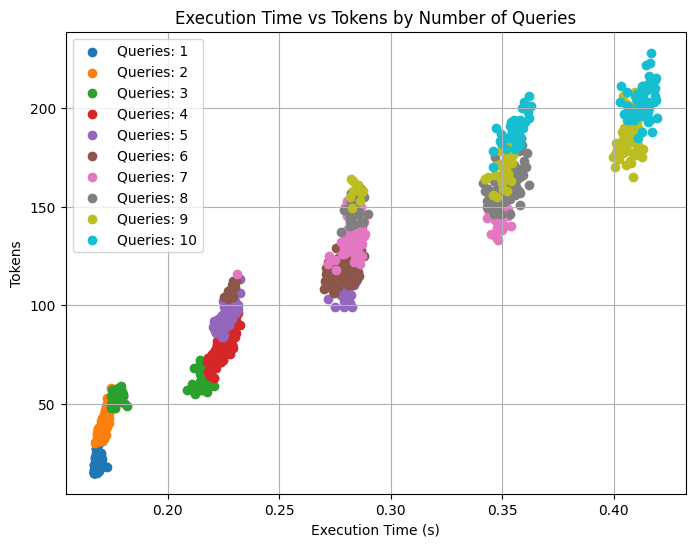

time: 588 ms (started: 2024-11-15 16:32:15 +00:00)


In [ ]:
import matplotlib.pyplot as plt

number_token = token['Mean Tokens'].astype(float) * token['Number of Queries'].astype(float)

plt.figure(figsize=(8, 6))

classes = token['Number of Queries'].unique()

for class_value in classes:
    class_mask = token['Number of Queries'] == class_value
    plt.scatter(
        times['Execution Time (s)'][class_mask],
        number_token[class_mask],
        label=f'Queries: {class_value}'
    )

plt.xlabel('Execution Time (s)')
plt.ylabel('Tokens')
plt.title('Execution Time vs Tokens by Number of Queries')
plt.legend()
plt.grid(True)
plt.show()


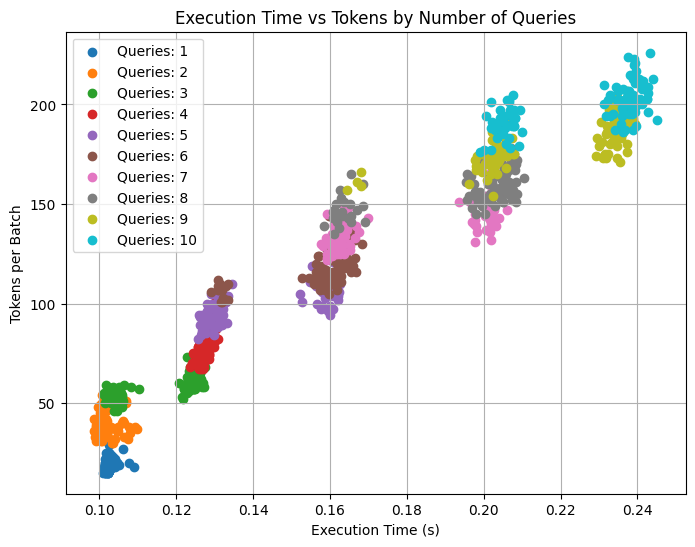

In [ ]:
import matplotlib.pyplot as plt

number_token = token['Mean Tokens'].astype(float) * token['Number of Queries'].astype(float)

plt.figure(figsize=(8, 6))

classes = token['Number of Queries'].unique()

for class_value in classes:
    class_mask = token['Number of Queries'] == class_value
    plt.scatter(
        times['Execution Time (s)'][class_mask],
        number_token[class_mask],
        label=f'Queries: {class_value}'
    )

plt.xlabel('Execution Time (s)')
plt.ylabel('Tokens per Batch')
plt.title('Execution Time vs Tokens by Number of Queries')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
embedd("hallo")

time: 128 ms (started: 2024-11-16 15:47:44 +00:00)


In [ ]:
embedd("hallo", model1, processor1)

time: 130 ms (started: 2024-11-16 15:47:29 +00:00)


In [ ]:
embedd("hallo", model2, processor2)

time: 131 ms (started: 2024-11-16 15:47:36 +00:00)
